In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_cross_check/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_crosscheck.ipynb

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)

#RootFile = ROOT.TFile(output_filedir+"genie_other_systematic.root","RECREATE");
#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.00616325213863
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	989714
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [14]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/root/h_eff_tilde_res.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/png/h_eff_tilde_res.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/pdf/h_eff_tilde_res.pdf has been created


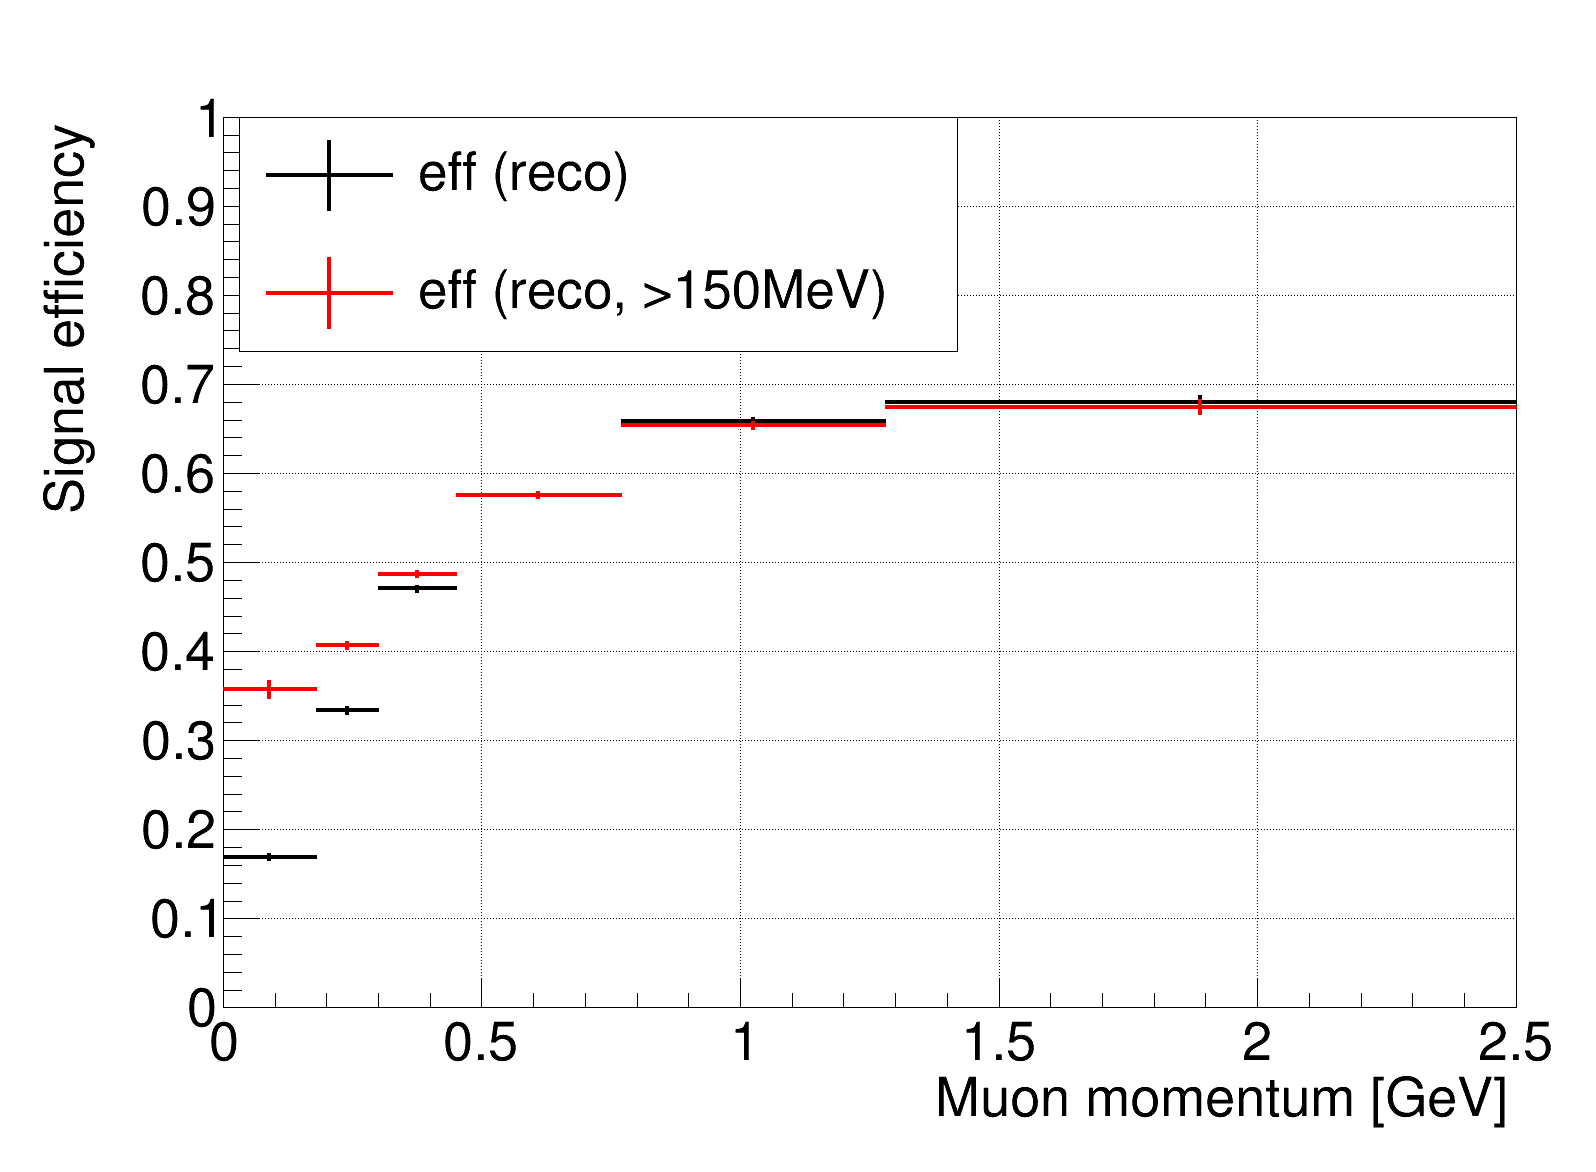

In [33]:
path_mc = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
f_mc = ROOT.TFile.Open(path_mc+"xsec_momentum_wighted.root", 'read')
h_eff_tilde = f_mc.Get('h_eff_tilde')

path_res = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_res = ROOT.TFile.Open(path_res+"xsec_momentum_wighted.root", 'read')
h_eff_tilde_res = f_res.Get('h_eff_tilde')


legend = ROOT.TLegend(0.15,0.7,0.6,0.9) # LEGEND LEFT
legend.AddEntry(h_eff_tilde,'eff (reco)',"lep")
legend.AddEntry(h_eff_tilde_res,'eff (reco, >150MeV)',"lep")

h_eff_tilde_res.SetLineColor(ROOT.kRed)

h_eff_tilde.Draw()
h_eff_tilde_res.Draw('same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_root + "h_eff_tilde_res.root")
c1.SaveAs(outputdir_png + "h_eff_tilde_res.png")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_res.pdf")


Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/root/h_eff_res.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/png/h_eff_res.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/pdf/h_eff_res.pdf has been created


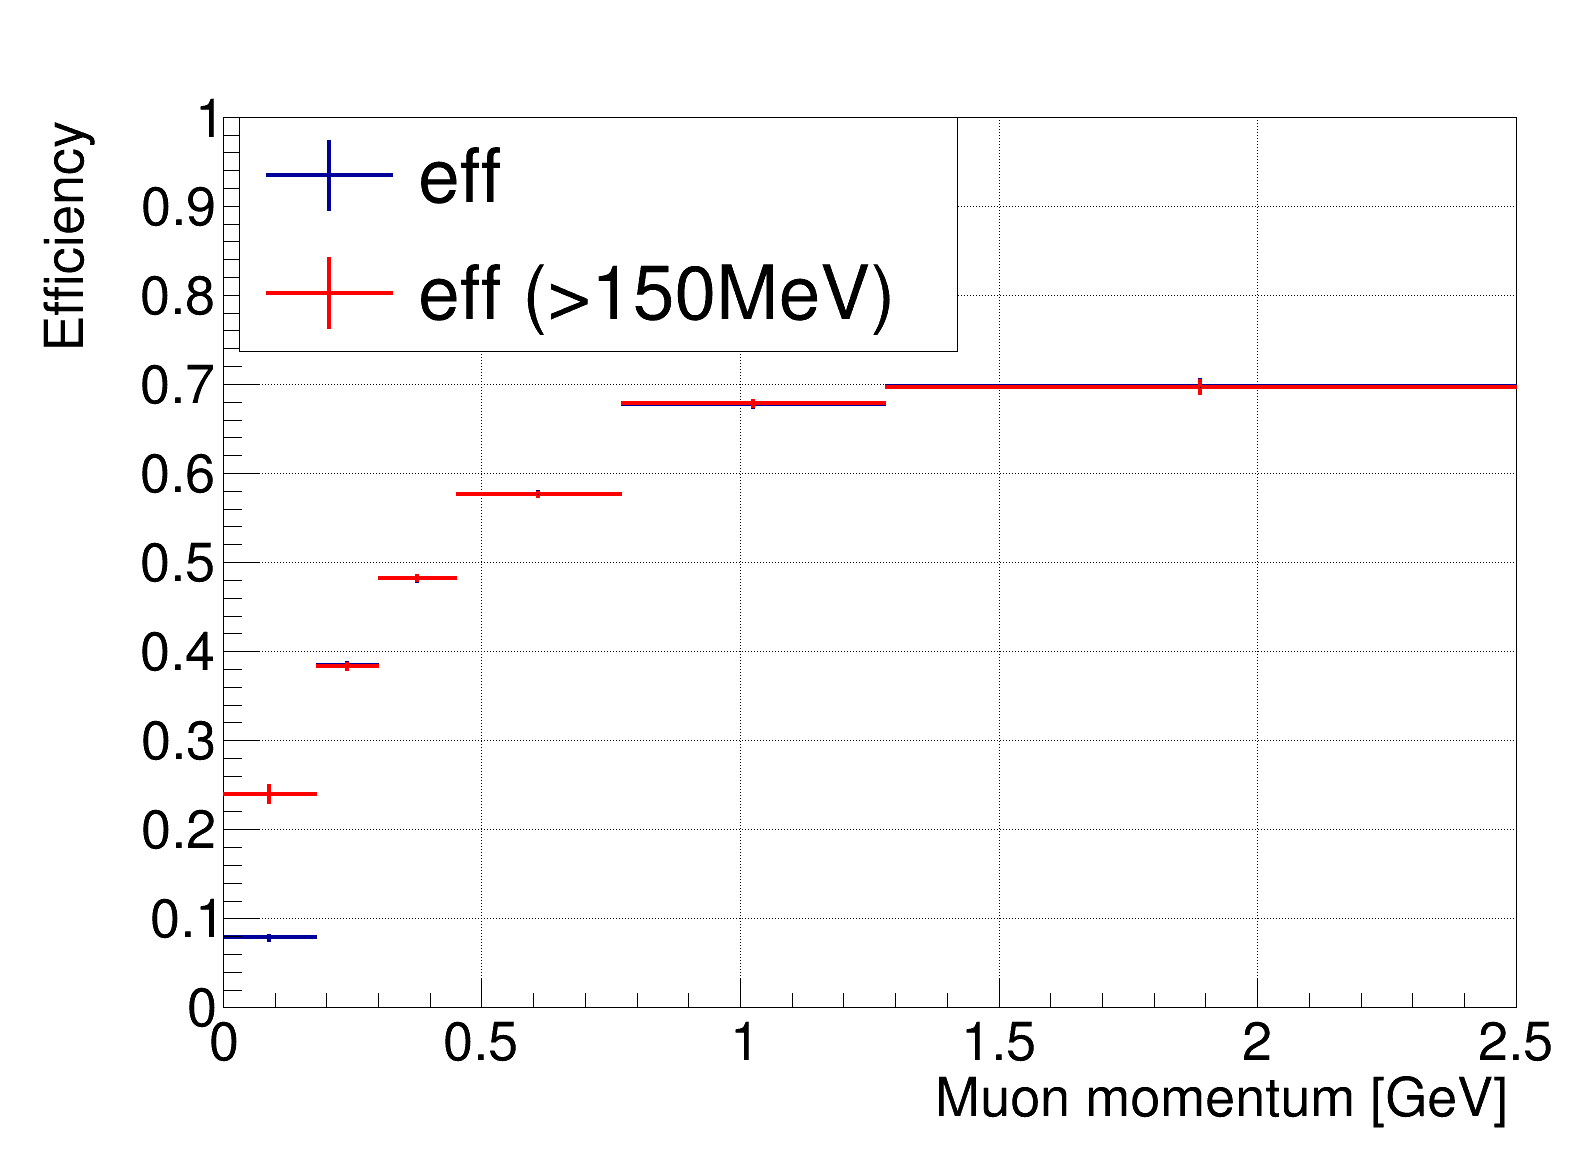

In [34]:
path_mc = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
f_mc = ROOT.TFile.Open(path_mc+"xsec_momentum_wighted.root", 'read')
h_eff_z = f_mc.Get('h_eff_true_energy_z')
h_eff_n = f_mc.Get('h_eff_true_energy_n')

h_eff_z.Divide(h_eff_n)

path_res = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_res = ROOT.TFile.Open(path_res+"xsec_momentum_wighted.root", 'read')
h_eff_z_res = f_res.Get('h_eff_true_energy_z')
h_eff_n_res = f_res.Get('h_eff_true_energy_n')

h_eff_z_res.Divide(h_eff_n_res)


legend = ROOT.TLegend(0.15,0.7,0.6,0.9) # LEGEND LEFT
legend.AddEntry(h_eff_z,'eff',"lep")
legend.AddEntry(h_eff_z_res,'eff (>150MeV)',"lep")

h_eff_z_res.SetLineColor(ROOT.kRed)
h_eff_z_res.SetLineWidth(4)
h_eff_z.SetLineWidth(4)
h_eff_z.SetMaximum(1)
h_eff_z.SetMinimum(0)

h_eff_z.SetXTitle("Muon momentum [GeV]")
h_eff_z.SetYTitle("Efficiency")
h_eff_z.GetYaxis().SetTitleSize(0.05)
h_eff_z.GetYaxis().SetTitleOffset(0.0)
h_eff_z.GetYaxis().SetLabelSize(0.05)
h_eff_z.GetXaxis().SetTitleSize(0.05)
h_eff_z.GetXaxis().SetLabelSize(0.05)
h_eff_z.GetXaxis().SetTitleOffset(1)

h_eff_z.Draw()
h_eff_z_res.Draw('same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_root + "h_eff_res.root")
c1.SaveAs(outputdir_png + "h_eff_res.png")
c1.SaveAs(outputdir_pdf + "h_eff_res.pdf")

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/root/h_eff_tilde_theta_res.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/png/h_eff_tilde_theta_res.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/pdf/h_eff_tilde_theta_res.pdf has been created


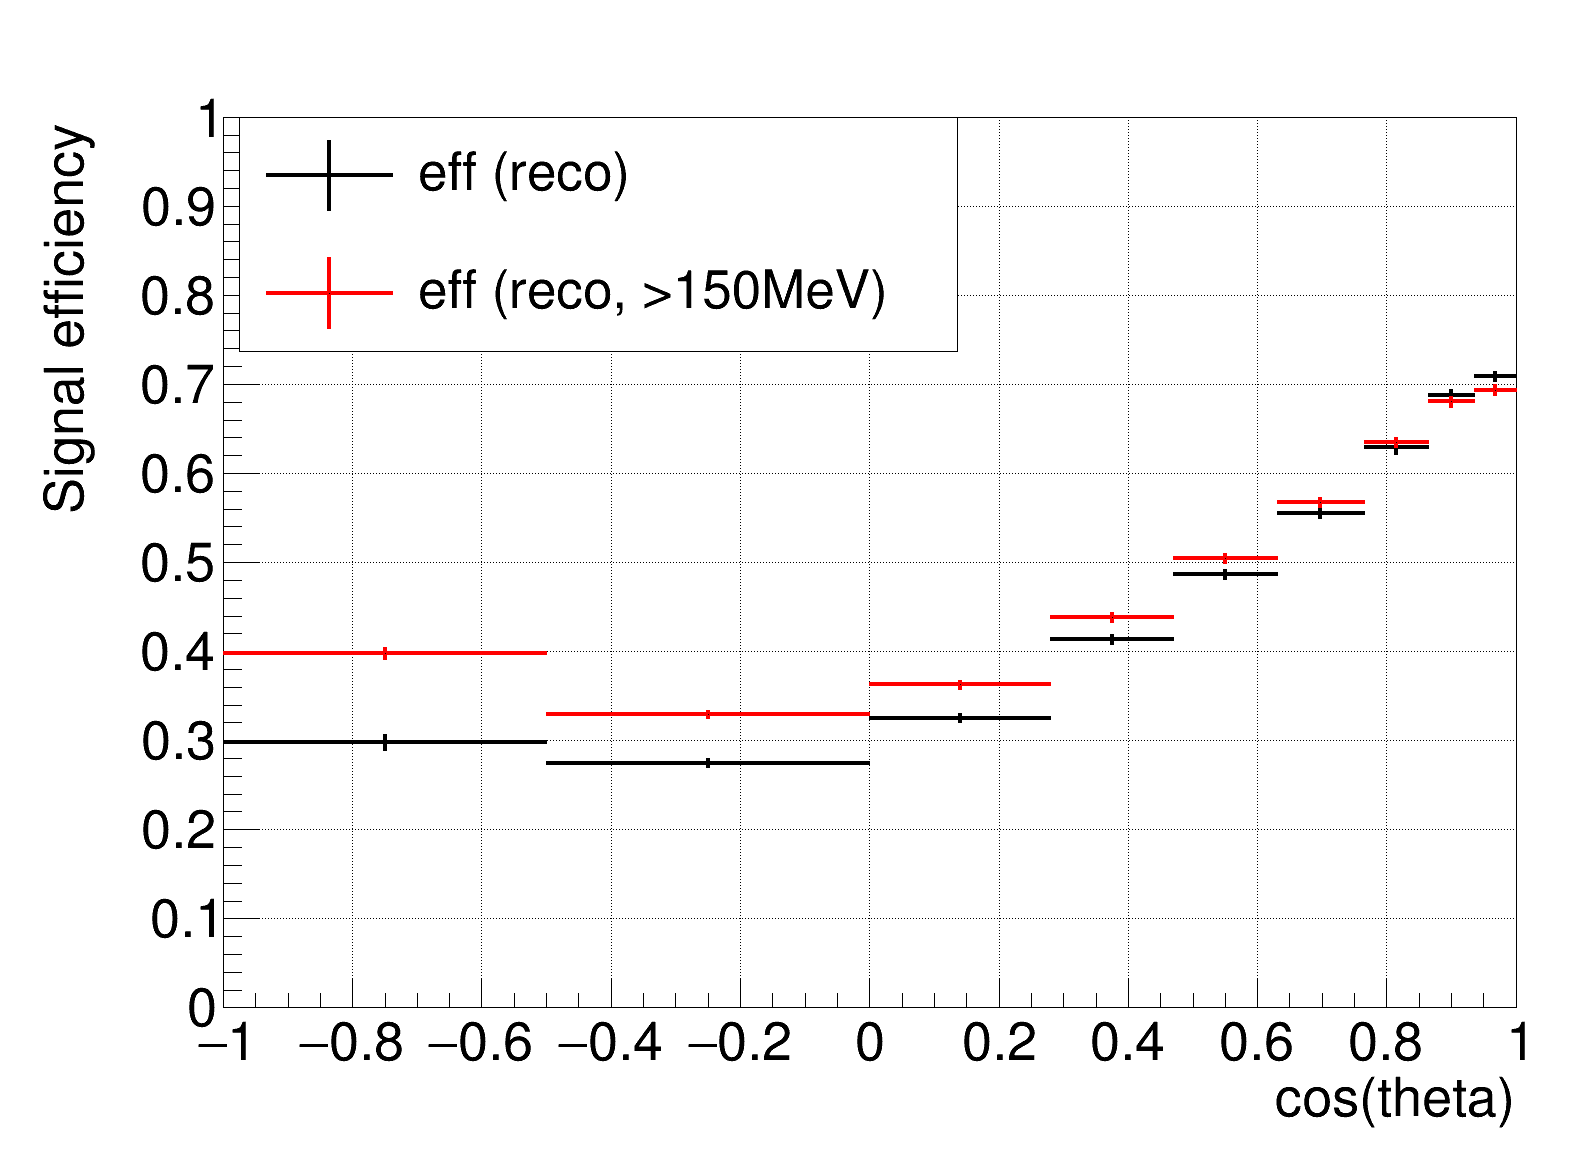

In [37]:
path_mc = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
f_mc = ROOT.TFile.Open(path_mc+"xsec_theta_wighted.root", 'read')
h_eff_tilde = f_mc.Get('h_eff_tilde')

path_res = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_res = ROOT.TFile.Open(path_res+"xsec_theta_wighted.root", 'read')
h_eff_tilde_res = f_res.Get('h_eff_tilde')


legend = ROOT.TLegend(0.15,0.7,0.6,0.9) # LEGEND LEFT
legend.AddEntry(h_eff_tilde,'eff (reco)',"lep")
legend.AddEntry(h_eff_tilde_res,'eff (reco, >150MeV)',"lep")

h_eff_tilde_res.SetLineColor(ROOT.kRed)
h_eff_tilde.SetXTitle("cos(theta)")

h_eff_tilde.Draw()
h_eff_tilde_res.Draw('same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_root + "h_eff_tilde_theta_res.root")
c1.SaveAs(outputdir_png + "h_eff_tilde_theta_res.png")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_theta_res.pdf")


Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/root/h_eff_theta_res.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/png/h_eff_theta_res.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/pdf/h_eff_theta_res.pdf has been created


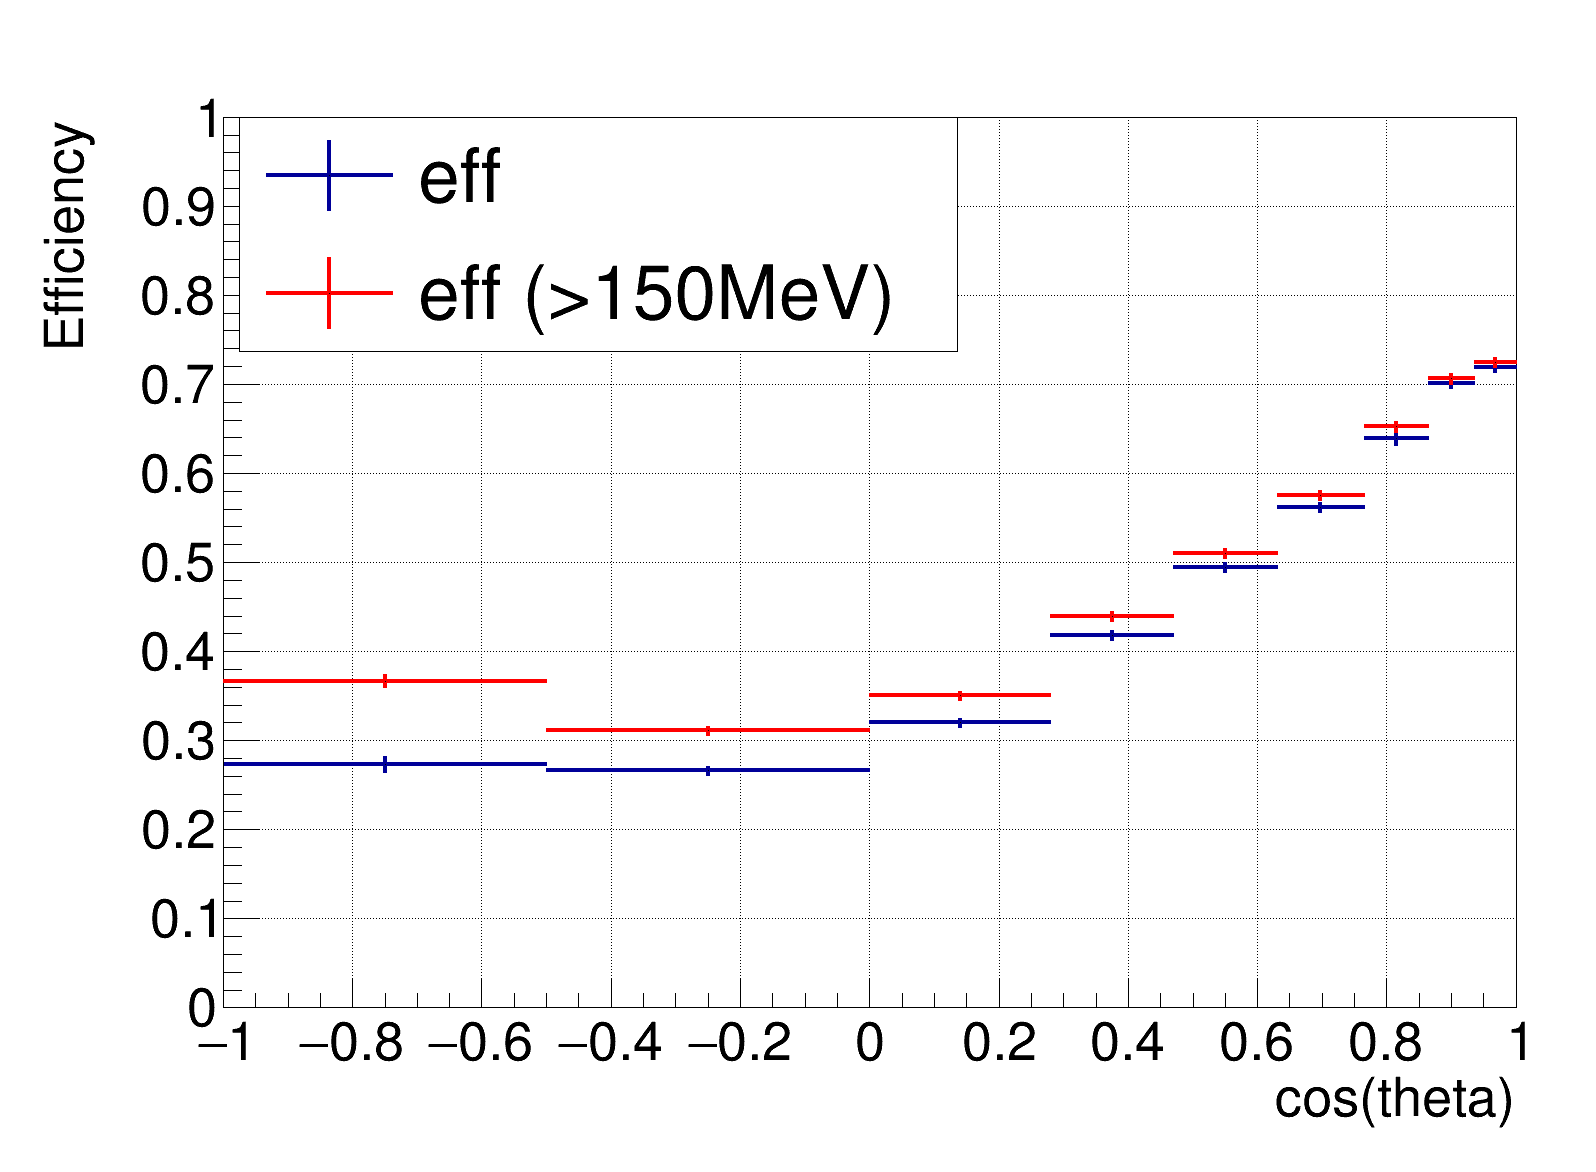

In [38]:
path_mc = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
f_mc = ROOT.TFile.Open(path_mc+"xsec_theta_wighted.root", 'read')
h_eff_z = f_mc.Get('h_eff_true_theta_z')
h_eff_n = f_mc.Get('h_eff_true_theta_n')

h_eff_z.Divide(h_eff_n)

path_res = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_res = ROOT.TFile.Open(path_res+"xsec_theta_wighted.root", 'read')
h_eff_z_res = f_res.Get('h_eff_true_theta_z')
h_eff_n_res = f_res.Get('h_eff_true_theta_n')

h_eff_z_res.Divide(h_eff_n_res)


legend = ROOT.TLegend(0.15,0.7,0.6,0.9) # LEGEND LEFT
legend.AddEntry(h_eff_z,'eff',"lep")
legend.AddEntry(h_eff_z_res,'eff (>150MeV)',"lep")

h_eff_z_res.SetLineColor(ROOT.kRed)
h_eff_z_res.SetLineWidth(4)
h_eff_z.SetLineWidth(4)
h_eff_z.SetMaximum(1)
h_eff_z.SetMinimum(0)

h_eff_z.SetXTitle("cos(theta)")
h_eff_z.SetYTitle("Efficiency")
h_eff_z.GetYaxis().SetTitleSize(0.05)
h_eff_z.GetYaxis().SetTitleOffset(0.0)
h_eff_z.GetYaxis().SetLabelSize(0.05)
h_eff_z.GetXaxis().SetTitleSize(0.05)
h_eff_z.GetXaxis().SetLabelSize(0.05)
h_eff_z.GetXaxis().SetTitleOffset(1)

h_eff_z.Draw()
h_eff_z_res.Draw('same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_root + "h_eff_theta_res.root")
c1.SaveAs(outputdir_png + "h_eff_theta_res.png")
c1.SaveAs(outputdir_pdf + "h_eff_theta_res.pdf")

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/root/h_xsec_theta_res.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/png/h_xsec_theta_res.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/pdf/h_xsec_theta_res.pdf has been created


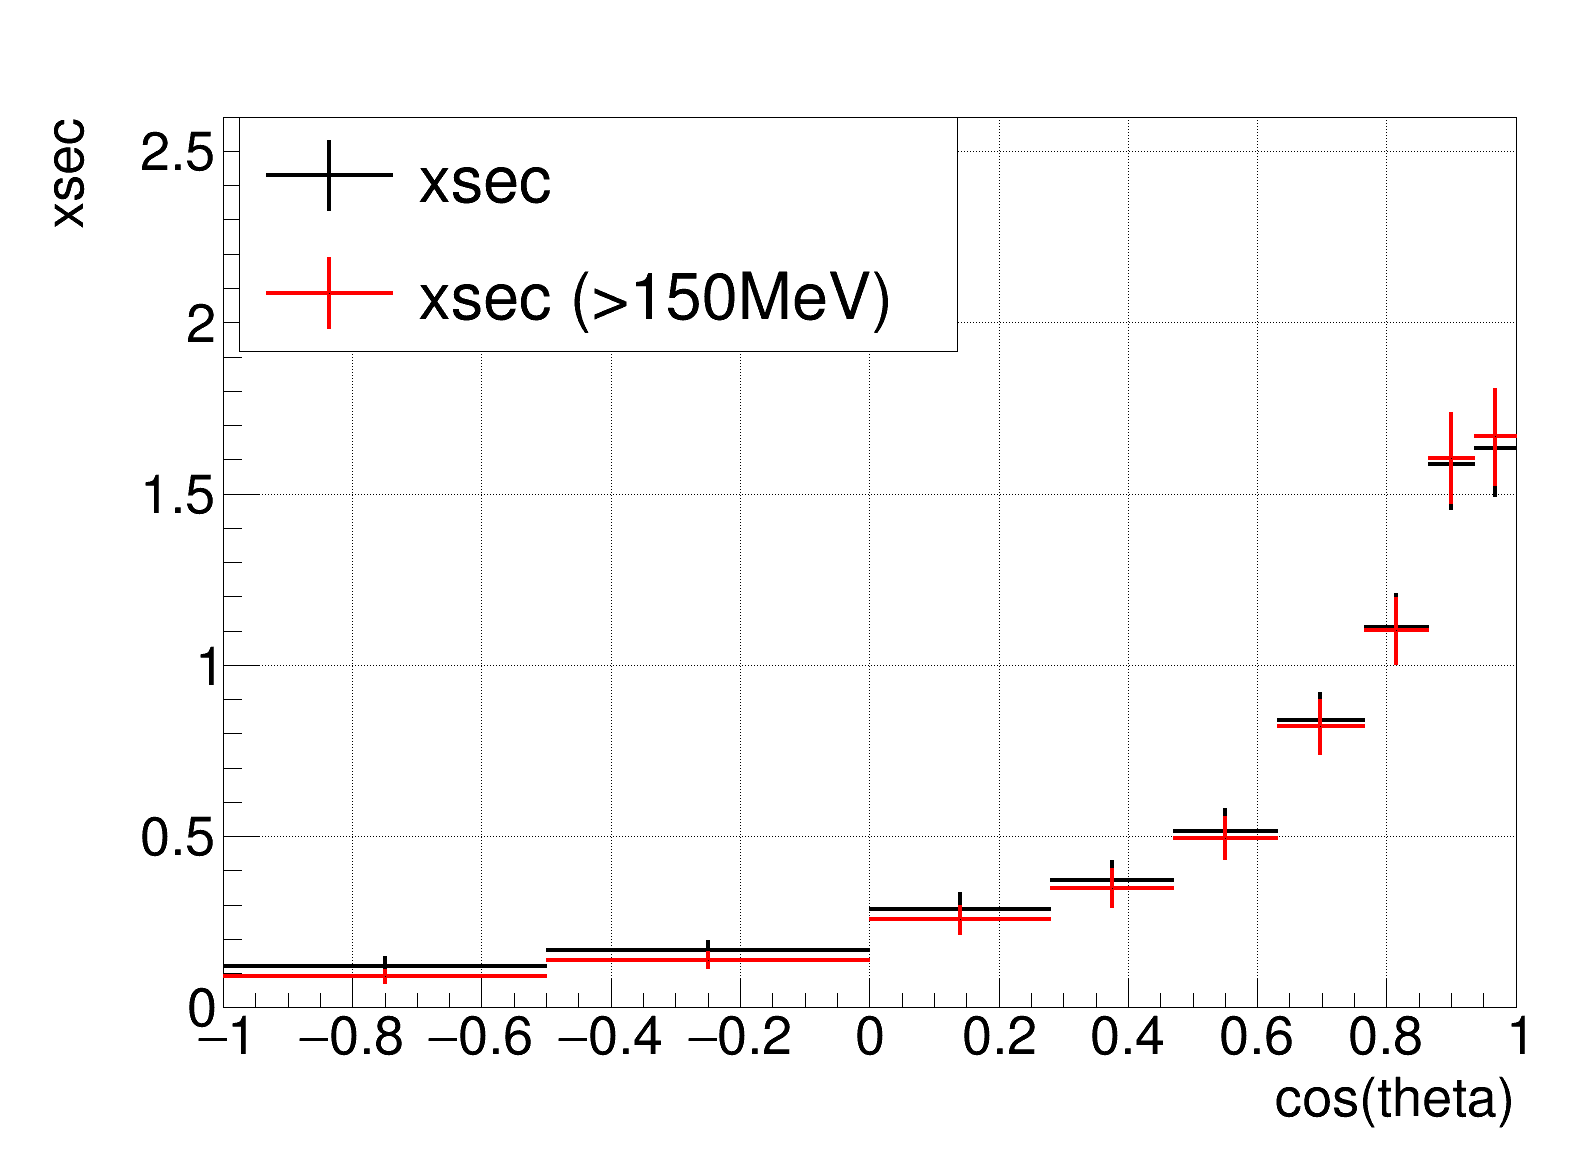

In [52]:
path_mc = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
f_mc = ROOT.TFile.Open(path_mc+"xsec_theta_wighted.root", 'read')
h_xsec = f_mc.Get('h_xsec_data')
h_xsec_MC = f_mc.Get('h_xsec_MC')

#h_eff_z.Divide(h_eff_n)

path_res = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_res = ROOT.TFile.Open(path_res+"xsec_theta_wighted.root", 'read')
h_xsec_res = f_res.Get('h_xsec_data_theta')
h_xsec_MC_res = f_res.Get('h_xsec_MC_theta')

#h_eff_z_res.Divide(h_eff_n_res)


legend = ROOT.TLegend(0.15,0.7,0.6,0.9) # LEGEND LEFT
legend.AddEntry(h_xsec,'xsec',"lep")
legend.AddEntry(h_xsec_res,'xsec (>150MeV)',"lep")
#legend.AddEntry(h_xsec_MC,'xsec MC',"l")
#legend.AddEntry(h_xsec_MC_res,'xsec MC (>150MeV)',"l")

h_xsec_res.SetLineColor(ROOT.kRed)
h_xsec_res.SetLineWidth(4)
h_xsec.SetLineWidth(4)
#h_xsec.SetMaximum(1)
#h_xsec.SetMinimum(0)

h_xsec.SetXTitle("cos(theta)")
h_xsec.SetYTitle("xsec")
h_xsec.GetYaxis().SetTitleSize(0.05)
h_xsec.GetYaxis().SetTitleOffset(0.0)
h_xsec.GetYaxis().SetLabelSize(0.05)
h_xsec.GetXaxis().SetTitleSize(0.05)
h_xsec.GetXaxis().SetLabelSize(0.05)
h_xsec.GetXaxis().SetTitleOffset(1)

h_xsec_MC.SetLineColor(ROOT.kBlue)
h_xsec_MC_res.SetLineColor(ROOT.kOrange)
h_xsec_MC.SetFillColor(0)
h_xsec_MC_res.SetFillColor(0)

h_xsec.Draw()
h_xsec_res.Draw('same')
#h_xsec_MC.Draw('hist same')
#h_xsec_MC_res.Draw('hist same')

legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_root + "h_xsec_theta_res.root")
c1.SaveAs(outputdir_png + "h_xsec_theta_res.png")
c1.SaveAs(outputdir_pdf + "h_xsec_theta_res.pdf")

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/root/h_xsec_res.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/png/h_xsec_res.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/pdf/h_xsec_res.pdf has been created


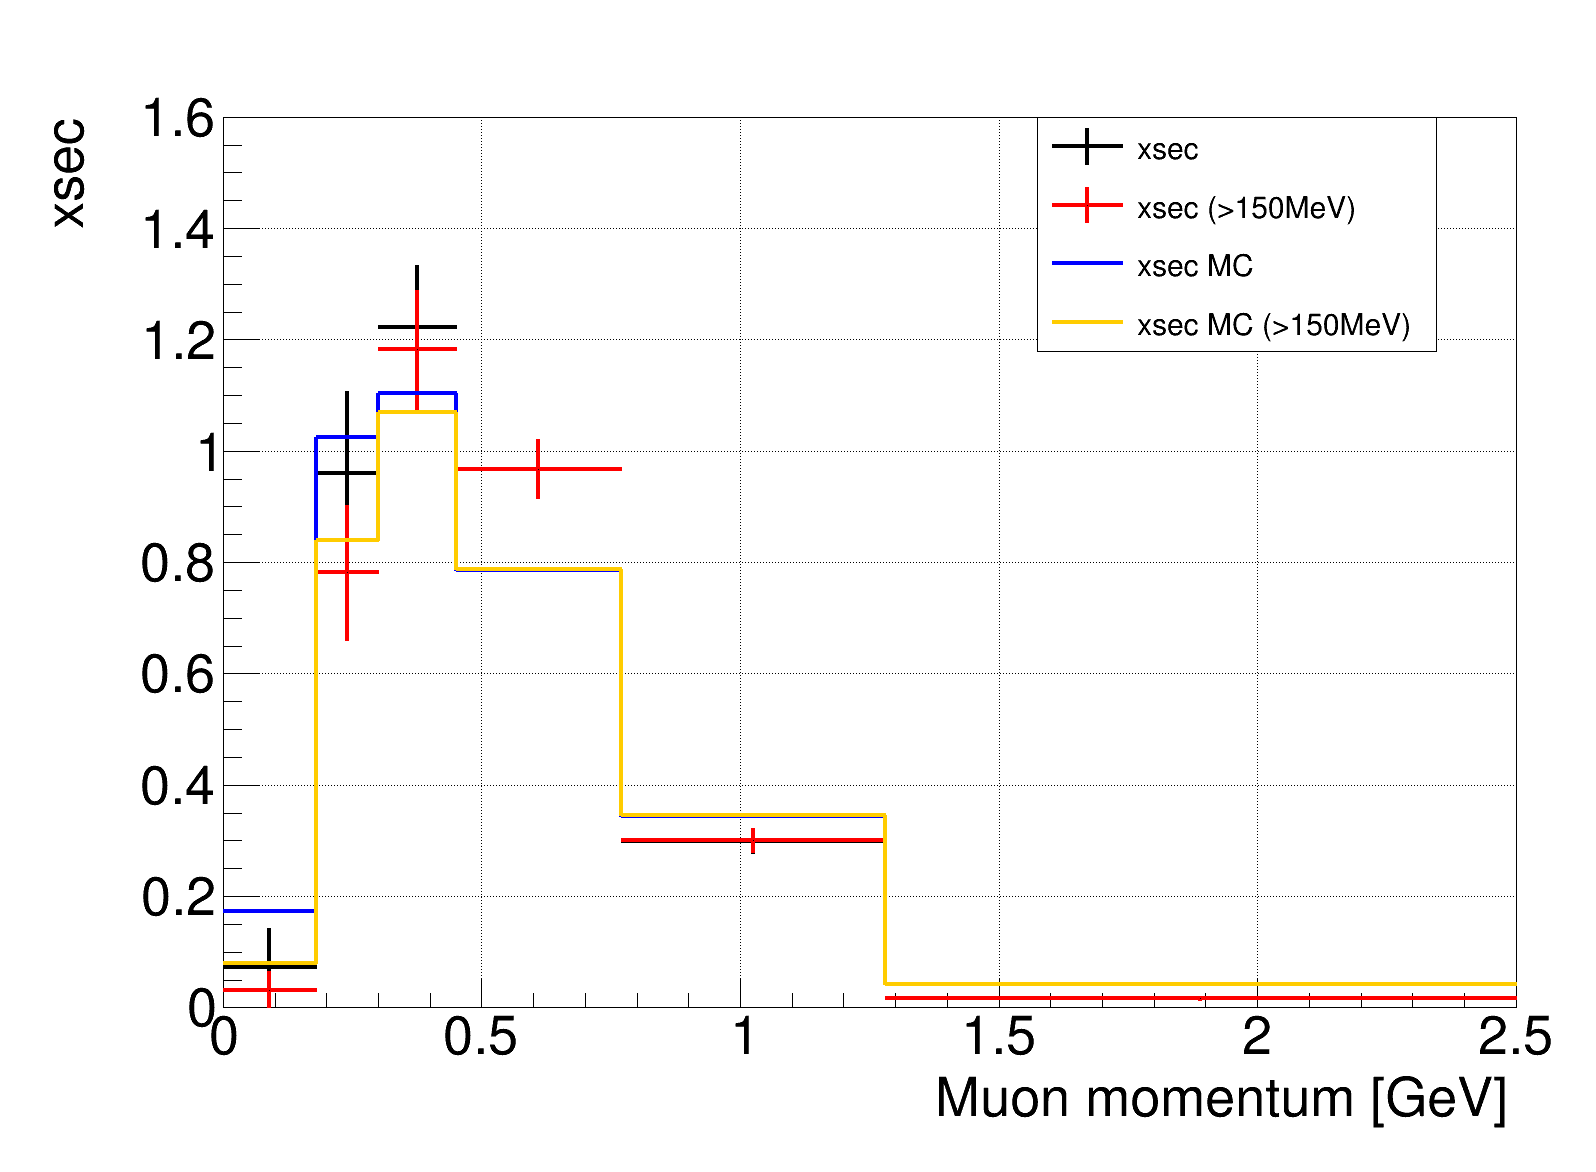

In [56]:
path_mc = '/home/tmettler/Desktop/weighted/xsec_filesV4/'
f_mc = ROOT.TFile.Open(path_mc+"xsec_momentum_wighted.root", 'read')
h_xsec = f_mc.Get('h_xsec_data')
h_xsec_MC = f_mc.Get('h_xsec_MC')

#h_eff_z.Divide(h_eff_n)

path_res = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_res = ROOT.TFile.Open(path_res+"xsec_momentum_wighted.root", 'read')
h_xsec_res = f_res.Get('h_xsec_data')
h_xsec_MC_res = f_res.Get('h_xsec_MC')

#h_eff_z_res.Divide(h_eff_n_res)


legend = ROOT.TLegend(0.65,0.7,0.9,0.9) # LEGEND LEFT
legend.AddEntry(h_xsec,'xsec',"lep")
legend.AddEntry(h_xsec_res,'xsec (>150MeV)',"lep")
legend.AddEntry(h_xsec_MC,'xsec MC',"l")
legend.AddEntry(h_xsec_MC_res,'xsec MC (>150MeV)',"l")

h_xsec_res.SetLineColor(ROOT.kRed)
h_xsec_res.SetLineWidth(4)
h_xsec.SetLineWidth(4)
#h_xsec.SetMaximum(1)
#h_xsec.SetMinimum(0)

h_xsec.SetXTitle("Muon momentum [GeV]")
h_xsec.SetYTitle("xsec")
h_xsec.GetYaxis().SetTitleSize(0.05)
h_xsec.GetYaxis().SetTitleOffset(0.0)
h_xsec.GetYaxis().SetLabelSize(0.05)
h_xsec.GetXaxis().SetTitleSize(0.05)
h_xsec.GetXaxis().SetLabelSize(0.05)
h_xsec.GetXaxis().SetTitleOffset(1)

h_xsec_MC.SetLineColor(ROOT.kBlue)
h_xsec_MC_res.SetLineColor(ROOT.kOrange)
h_xsec_MC.SetFillColor(0)
h_xsec_MC_res.SetFillColor(0)

h_xsec.Draw()
h_xsec_res.Draw('same')
h_xsec_MC.Draw('hist same')
h_xsec_MC_res.Draw('hist same')

legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_root + "h_xsec_res.root")
c1.SaveAs(outputdir_png + "h_xsec_res.png")
c1.SaveAs(outputdir_pdf + "h_xsec_res.pdf")

In [16]:
sdffesg

NameError: name 'sdffesg' is not defined

In [ ]:
cut = 'fidVol && muon && numu_signal'
#cut = '1'
h_muon_proton = ROOT.TH1F("h_muon_proton",'muons protons',200,-10,1e4)
overlay_out.Draw('MCle_length'+'>>h_muon_proton','('+cut+'&& 1)','')
ROOT.gStyle.SetOptStat(1)
h_muon_proton.SetXTitle("Track PID chi2 proton")
h_muon_proton.SetYTitle("Track PID chi2 muon")
h_muon_proton.GetYaxis().SetTitleSize(0.05)
h_muon_proton.GetYaxis().SetTitleOffset(0.0)
h_muon_proton.GetYaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleSize(0.05)
h_muon_proton.GetXaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleOffset(1)
h_muon_proton.SetLineColor(ROOT.kBlack)
h_muon_proton.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_proton.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
##c1.SaveAs(outputdir_root + "h_muon_proton_all.root")
#c1.SaveAs(outputdir_png + "h_muon_proton_all.png")
#c1.SaveAs(outputdir_pdf + "h_muon_proton_all.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
cut = 'fidVol && muon && numu_signal'
#cut = '1'
h_muon_proton = ROOT.TH1F("h_muon_proton",'muons protons',200,-1,1)
overlay_out.Draw('cos(MCNu_leptonTheta)'+'>>h_muon_proton','('+cut+'&& 1)','')
h_muon_proton2 = ROOT.TH1F("h_muon_proton2",'muons protons',200,-1,1)
overlay_out.Draw('cos(MCle_Theta)'+'>>h_muon_proton2','('+cut+'&& 1)','')
ROOT.gStyle.SetOptStat(1)
h_muon_proton.SetXTitle("Track PID chi2 proton")
h_muon_proton.SetYTitle("Track PID chi2 muon")
h_muon_proton.GetYaxis().SetTitleSize(0.05)
h_muon_proton.GetYaxis().SetTitleOffset(0.0)
h_muon_proton.GetYaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleSize(0.05)
h_muon_proton.GetXaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleOffset(1)
h_muon_proton.SetLineColor(ROOT.kBlack)
h_muon_proton.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_proton.Draw("colz")
h_muon_proton2.Draw('same')
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
##c1.SaveAs(outputdir_root + "h_muon_proton_all.root")
#c1.SaveAs(outputdir_png + "h_muon_proton_all.png")
#c1.SaveAs(outputdir_pdf + "h_muon_proton_all.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal\
                && cos(MCNu_leptonTheta)<0'

#h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,0)
#overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration = ROOT.TH1F("h_migration",'Truth vs. Reco',20,-1,1)
h_migration2 = ROOT.TH1F("h_migration2",'Truth vs. Reco',20,-1,1)
overlay_out.Draw('cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& MCNu_Interaction==0)','')
overlay_out.Draw('cos(TrackTheta)'+'>>h_migration2',weight_name+'*('+cut+')','')

h_migration.Divide(h_migration2)
h_migration.SetXTitle("reco Muon cos(Theta)")
h_migration.SetYTitle("Amount of backwards qe interactions")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_migration.Draw("hist")
h_migration.SetLineColor(ROOT.kRed)
#h_migration2.Draw("hist same")

prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_costheta_qe.root")
c1.SaveAs(outputdir_png + "h2_true_costheta_qe.png")
c1.SaveAs(outputdir_pdf + "h2_true_costheta_qe.pdf")

#h_migration.Write("h2_true_theta_fine")

In [ ]:
#cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
#                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
cut = 'MCTrackPurity>0.5 && TrackPID_chimuon>0.4'
#cut = '1'
h_muon_proton = ROOT.TH2F("h_muon_proton",'muons protons',200,0,500,200,0,100)
overlay.Draw('TrackPID_chimuon:TrackPID_chiproton'+'>>h_muon_proton','('+cut+'&& 1)','')
h_muon_proton.SetXTitle("Track PID chi2 proton")
h_muon_proton.SetYTitle("Track PID chi2 muon")
h_muon_proton.GetYaxis().SetTitleSize(0.05)
h_muon_proton.GetYaxis().SetTitleOffset(0.0)
h_muon_proton.GetYaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleSize(0.05)
h_muon_proton.GetXaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleOffset(1)
h_muon_proton.SetLineColor(ROOT.kBlack)
h_muon_proton.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_proton.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h_muon_proton_all.root")
c1.SaveAs(outputdir_png + "h_muon_proton_all.png")
c1.SaveAs(outputdir_pdf + "h_muon_proton_all.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
#cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
#                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
cut = 'MCTrackPurity>0.5 && MCTrackPDG==13 && TrackPID_chimuon>0.4'
#cut = '1'
h_muon_proton = ROOT.TH2F("h_muon_proton",'muons protons',200,0,500,200,0,100)
overlay.Draw('TrackPID_chimuon:TrackPID_chiproton'+'>>h_muon_proton','('+cut+'&& 1)','')
h_muon_proton.SetXTitle("Track PID chi2 proton")
h_muon_proton.SetYTitle("Track PID chi2 muon")
h_muon_proton.GetYaxis().SetTitleSize(0.05)
h_muon_proton.GetYaxis().SetTitleOffset(0.0)
h_muon_proton.GetYaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleSize(0.05)
h_muon_proton.GetXaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleOffset(1)
h_muon_proton.SetLineColor(ROOT.kBlack)
h_muon_proton.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_proton.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h_muon_proton_muon.root")
c1.SaveAs(outputdir_png + "h_muon_proton_muon.png")
c1.SaveAs(outputdir_pdf + "h_muon_proton_muon.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
#cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
#                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
cut = 'MCTrackPurity>0.5 && MCTrackPDG!=13 && TrackPID_chimuon>0.4'
#cut = '1'
h_muon_proton = ROOT.TH2F("h_muon_proton",'muons protons',200,0,500,200,0,100)
overlay.Draw('TrackPID_chimuon:TrackPID_chiproton'+'>>h_muon_proton','('+cut+'&& 1)','')
h_muon_proton.SetXTitle("Track PID chi2 proton")
h_muon_proton.SetYTitle("Track PID chi2 muon")
h_muon_proton.GetYaxis().SetTitleSize(0.05)
h_muon_proton.GetYaxis().SetTitleOffset(0.0)
h_muon_proton.GetYaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleSize(0.05)
h_muon_proton.GetXaxis().SetLabelSize(0.05)
h_muon_proton.GetXaxis().SetTitleOffset(1)
h_muon_proton.SetLineColor(ROOT.kBlack)
h_muon_proton.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_proton.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h_muon_proton_nomuon.root")
c1.SaveAs(outputdir_png + "h_muon_proton_nomuon.png")
c1.SaveAs(outputdir_pdf + "h_muon_proton_nomuon.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
#cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
#                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
cut = 'MCTrackPurity>0.5 && TrackPID_chimuon>0.4'
#cut = '1'
h_muon_pion = ROOT.TH2F("h_muon_pion",'muons pion',200,0,80,200,0,80)
overlay.Draw('TrackPID_chimuon:TrackPID_chipion'+'>>h_muon_pion','('+cut+'&& 1)','')
h_muon_pion.SetXTitle("Track PID chi2 pion")
h_muon_pion.SetYTitle("Track PID chi2 muon")
h_muon_pion.GetYaxis().SetTitleSize(0.05)
h_muon_pion.GetYaxis().SetTitleOffset(0.0)
h_muon_pion.GetYaxis().SetLabelSize(0.05)
h_muon_pion.GetXaxis().SetTitleSize(0.05)
h_muon_pion.GetXaxis().SetLabelSize(0.05)
h_muon_pion.GetXaxis().SetTitleOffset(1)
h_muon_pion.SetLineColor(ROOT.kBlack)
h_muon_pion.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_pion.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h_muon_pion_all.root")
c1.SaveAs(outputdir_png + "h_muon_pion_all.png")
c1.SaveAs(outputdir_pdf + "h_muon_pion_all.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
#cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
#                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
cut = 'MCTrackPurity>0.5 && MCTrackPDG==13 && TrackPID_chimuon>0.4'
#cut = '1'
h_muon_pion = ROOT.TH2F("h_muon_pion",'muons pion',200,0,80,200,0,80)
overlay.Draw('TrackPID_chimuon:TrackPID_chipion'+'>>h_muon_pion','('+cut+'&& 1)','')
h_muon_pion.SetXTitle("Track PID chi2 pion")
h_muon_pion.SetYTitle("Track PID chi2 muon")
h_muon_pion.GetYaxis().SetTitleSize(0.05)
h_muon_pion.GetYaxis().SetTitleOffset(0.0)
h_muon_pion.GetYaxis().SetLabelSize(0.05)
h_muon_pion.GetXaxis().SetTitleSize(0.05)
h_muon_pion.GetXaxis().SetLabelSize(0.05)
h_muon_pion.GetXaxis().SetTitleOffset(1)
h_muon_pion.SetLineColor(ROOT.kBlack)
h_muon_pion.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_pion.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h_muon_pion_muon.root")
c1.SaveAs(outputdir_png + "h_muon_pion_muon.png")
c1.SaveAs(outputdir_pdf + "h_muon_pion_muon.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
#cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
#                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
cut = 'MCTrackPurity>0.5 && MCTrackPDG!=13 && TrackPID_chimuon>0.4'
#cut = '1'
h_muon_pion = ROOT.TH2F("h_muon_pion",'muons pion',200,0,80,200,0,80)
overlay.Draw('TrackPID_chimuon:TrackPID_chipion'+'>>h_muon_pion','('+cut+'&& 1)','')
h_muon_pion.SetXTitle("Track PID chi2 pion")
h_muon_pion.SetYTitle("Track PID chi2 muon")
h_muon_pion.GetYaxis().SetTitleSize(0.05)
h_muon_pion.GetYaxis().SetTitleOffset(0.0)
h_muon_pion.GetYaxis().SetLabelSize(0.05)
h_muon_pion.GetXaxis().SetTitleSize(0.05)
h_muon_pion.GetXaxis().SetLabelSize(0.05)
h_muon_pion.GetXaxis().SetTitleOffset(1)
h_muon_pion.SetLineColor(ROOT.kBlack)
h_muon_pion.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_muon_pion.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h_muon_pion_nomuon.root")
c1.SaveAs(outputdir_png + "h_muon_pion_nomouon.png")
c1.SaveAs(outputdir_pdf + "h_muon_pion_nomuon.pdf")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
add_name = '_wo_crt'

In [ ]:
NuCC_w.plot_eff_all_w('MCNu_Energy',0,2.5,20,'Truth neutrino energy [GeV]','energy_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('cos(MCNu_leptonTheta)',-1,1,20,'True cos(theta)','costheta_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCNu_Vx',0,250,50,'Truth neutrino vertex X [cm]','Vx_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCNu_Vy',-120,120,50,'Truth neutrino vertex Y [cm]','Vy_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCNu_Vz',0,1000,50,'Truth neutrino vertex Z [cm]','Vz_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCle_Energy',0,2.5,50,'Truth muon momentum [GeV]','mom_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCNu_PDG',14,15,1,'True neutrino PDG','MCNu_PDG_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCNu_time',3000,5000,50,'True neutrino time [ns]','MCNu_time_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCle_Phi',-3.15,3.15,50,'Truth phi angle','MCTrackPhi_all'+add_name,'left')

In [ ]:
NuCC_w.plot_eff_all_w('MCle_length',0,1500,50,'Truth track length [cm]','MCTrackLength_all'+add_name,'left')

In [ ]:
#NuCC_w.plot_eff_all_w('MCTrackMomentum',0,2.5,50,'Truth muon momentum [GeV]','mom_all'+add_name,'left')

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_oneTrack = ROOT.TH1F("h_oneTrack",'h_oneTrack',50,0,1)
h_oneTrack2 = ROOT.TH1F("h_oneTrack2",'h_oneTrack',50,0,1)
globale.overlay_out.Draw('MCTrackPurity'+'>>h_oneTrack',weight_name+'*('+cut+'&& 1)','')
globale.overlay_out.Draw('MCTrackPurity'+'>>h_oneTrack2',weight_name+'*('+cut+'&& NuTracks==1)','')
h_oneTrack.SetXTitle("MC track purity")
h_oneTrack.SetYTitle("Entries")
h_oneTrack.GetYaxis().SetTitleSize(0.05)
h_oneTrack.GetYaxis().SetTitleOffset(0.0)
h_oneTrack.GetYaxis().SetLabelSize(0.05)
h_oneTrack.GetXaxis().SetTitleSize(0.05)
h_oneTrack.GetXaxis().SetLabelSize(0.05)
h_oneTrack.GetXaxis().SetTitleOffset(1)
h_oneTrack.SetLineColor(ROOT.kBlack)
h_oneTrack.SetLineWidth(4)
h_oneTrack2.SetLineColor(ROOT.kRed)
h_oneTrack2.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
c1.SetLeftMargin(0.2)
legend = ROOT.TLegend(0.2,0.65,0.6,0.9) # LEGEND LEFT
legend.AddEntry(h_oneTrack,'All events',"f")
legend.AddEntry(h_oneTrack2,'One track events',"f")
h_oneTrack.Draw("Hist")
h_oneTrack2.Draw('hist same')
prelim = NuCC_w.draw_sim()
prelim.Draw()
legend.Draw()
#h_migration.Draw("same text")
c1.Draw()

In [ ]:
h_oneTrack
h_oneTrack.Scale(1.0/h_oneTrack.Integral())
h_oneTrack2.Scale(1.0/h_oneTrack2.Integral())
h_oneTrack.SetYTitle("Bin entry / all entries")
h_oneTrack.Draw("Hist")
h_oneTrack2.Draw('hist same')
prelim = NuCC_w.draw_sim()
prelim.Draw()
legend.Draw()
#h_migration.Draw("same text")
c1.Draw()

In [ ]:
h_oneTrack2.Divide(h_oneTrack)
h_oneTrack2.SetXTitle("MC track purity")
h_oneTrack2.SetYTitle("Amount of one track events")
h_oneTrack2.Draw()
prelim.Draw()
c1.Draw()

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
h_migration.Draw("colz")
#prelim = draw_sim()
#prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
#c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
#c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
#h_migration.Write("h2_true_MCS_fine")

In [ ]:
h_migration.Draw('colz')
h_prof = h_migration.ProfileX()
h_prof.SetLineColor(ROOT.kRed)
h_prof.SetLineWidth(4)
h_prof.Draw('same')
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_all_cut_binned'
side_right = 'right'
side_left = 'left'
folder = 'All_cuts/'
folder = ''
#outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir+folder)
#NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
#NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,2,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
'''NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')'''
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
'''NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)
'''
#NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','nr_crthit_beam_tres','EventWeight','Number of CRTHits in beam window',0,4,4,folder+'CRTHit_tres'+name,side_right)
#NuCC_w.make_stacked_histo_weightV2(cut + ' && !track_end_uncontained','nr_crthit_beam_tres','EventWeight','Number of CRTHits in beam window',0,4,4,folder+'CRTHit_tres_cont'+name,side_right)
#NuCC_w.make_stacked_histo_weightV2(cut + ' && crtt0_time!=-1','crtt0_time','EventWeight','CRTHit - track association time',-2500,2500,25,folder+'CRTAsso_'+name,side_right)


In [ ]:
cut = 'fidVol && muon'
name = '_precut'
side_right = 'right'
side_left = 'left'
#folder = 'XPrecut/'
#outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir+folder)
#NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
#NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
#NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,2,20,folder+'TrackMom'+name,side_right)
#NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
'''NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weightV2(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)
'''
#NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','nr_crthit_beam_tres','EventWeight','Number of CRTHits in beam window',0,4,4,folder+'CRTHit_tres'+name,side_right)
#NuCC_w.make_stacked_histo_weightV2(cut + ' && !track_end_uncontained','nr_crthit_beam_tres','EventWeight','Number of CRTHits in beam window',0,4,4,folder+'CRTHit_tres_cont'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && crtt0_time!=-1','crtt0_time','EventWeight','CRTHit - track association time',-2500,2500,25,folder+'CRTAsso_'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8'
name = '_quality_cut'
side_right = 'right'
side_left = 'left'
folder = 'Quality_cut/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weightV2(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut'
name = '_crt_cut'
side_right = 'right'
side_left = 'left'
folder = 'Crt_cuts/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weightV2(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8'
name = '_trackscore_cut'
side_right = 'right'
side_left = 'left'
folder = 'TrackScore_cut/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weightV2(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20'
name = '_tracklength_cut'
side_right = 'right'
side_left = 'left'
folder = 'Tracklength_cut/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weightV2(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78'
name = '_TrackPID_cut'
side_right = 'right'
side_left = 'left'
folder = 'TrackPID_cut/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weightV2(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
# MCC8 plots

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_all_cut'
side_right = 'right'
side_left = 'left'
folder = 'MCC8_All_cuts/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78'
name = '_trackPID_cut'
side_right = 'right'
side_left = 'left'
folder = 'MCC8_TrackPID_cut/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20'
name = '_tracklength_cut'
side_right = 'right'
side_left = 'left'
folder = 'MCC8_TrackLength_cut/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8'
name = '_trackscore_cut'
side_right = 'right'
side_left = 'left'
folder = 'MCC8_TrackScore_cuts/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut'
name = '_crt_cut'
side_right = 'right'
side_left = 'left'
folder = 'MCC8_Crt_cuts/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon && TrackLength>8'
name = '_quality_cut'
side_right = 'right'
side_left = 'left'
folder = 'MCC8_Qualtity_cut/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
cut = 'fidVol && muon'
name = '_precut'
side_right = 'right'
side_left = 'left'
folder = 'MCC8_Precuts/'
os.mkdir(outputdir_png+folder)
os.mkdir(outputdir_root+folder)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,folder+'NuVx_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,folder+'NuVy_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8_V(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,folder+'NuVz_sce'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,folder+'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,folder+'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,folder+'phi'+name,side_left)

NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,50,folder+'TrackLength'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,folder+'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,folder+'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,folder+'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,folder+'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,folder+'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,folder+'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,folder+'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,folder+'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weight_MCC8(cut,'NuScore','EventWeight','Topological score',0,1,20,folder+'NuScore'+name,'right')
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,folder+'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_weight_MCC8(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,folder+'NumPfp'+name,side_right)


In [ ]:
outputdir = outputdir+'Efficienies/'
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)


In [ ]:
nenner = 'numu_true'
cut = 'fidVol && muon'
zahler = cut+' && numu_signal'
NuCC_w.plot_eff_w(nenner,zahler,cut,'precut','precut')

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
zahler = cut+' && numu_signal'
name = 'all_cuts'
NuCC_w.plot_eff_w(nenner,zahler,cut,name,name)

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78'
zahler = cut+' && numu_signal'
name = 'trackPID_cut'
NuCC_w.plot_eff_w(nenner,zahler,cut,name,name)

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20'
zahler = cut+' && numu_signal'
name = 'trackLength_cut'
NuCC_w.plot_eff_w(nenner,zahler,cut,name,name)

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8'
zahler = cut+' && numu_signal'
name = 'trackScore_cut'
NuCC_w.plot_eff_w(nenner,zahler,cut,name,name)

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut'
zahler = cut+' && numu_signal'
name = 'crt_cuts'
NuCC_w.plot_eff_w(nenner,zahler,cut,name,name)

In [ ]:
cut = 'fidVol && muon && TrackLength>8'
zahler = cut+' && numu_signal'
name = 'quality_cuts'
NuCC_w.plot_eff_w(nenner,zahler,cut,name,name)

# make plots before and after cuts on cut variables:

In [ ]:
cut = 'fidVol && muon'
name = '_precut'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Track momentum (MCS) [GeV]',0,1.5,20,'TrackMomantum'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','cos(theta)',-1,1,20,'cos(theta)'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPhi','EventWeight','Track phi',-3.15,3.15,20,'phi'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,'PIDpion'+name,'right')

NuCC_w.make_stacked_histo_weightV2(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,'PIDmupion_ration'+name,'right')

NuCC_w.make_stacked_histo_weightV2(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_weightV2(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name,'right')

NuCC_w.make_stacked_histo_weightV2(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_weightV2(cut,'NuScore','EventWeight','Topological score',0,1,20,'NuScore'+name,'right')





In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'CRT hit time'
xbins = 50
xstart = 2
xend = 5.5
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)

ROOT.gStyle.SetLineWidth(2)

data.Draw('crthit_ts0-(crt_trig_corr_med)/1000>>h_data')
ext.Draw('crthit_ts0-(crt_trig_corr_med)/1000>>h_ext')
overlay.Draw('crthit_ts0>>h_overlay','','')
dirt.Draw('crthit_ts0>>h_dirt','','')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_time_uncorr.png")
c1.SaveAs(outputdir_root + "h_crt_time_uncorr.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'CRT hit time'
xbins = 50
xstart = 2
xend = 5.5
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)

cut = 'crt_adc>100'

data.Draw('crthit_ts0>>h_data',cut)
ext.Draw('crthit_ts0-3.57+3.195>>h_ext',cut)
overlay.Draw('crthit_ts0>>h_overlay',cut,'')
dirt.Draw('crthit_ts0>>h_dirt',cut,'')


h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_time_corr.png")
c1.SaveAs(outputdir_root + "h_crt_time_corr.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'CRT hit time'
xbins = 50
xstart = 2
xend = 5.5
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)

cut = 'nr_crthit_top == 1 && crt_adc>70'

data_out.Draw('crthit_ts0>>h_data',cut)
ext_out.Draw('crthit_ts0-3.57+3.195>>h_ext',cut)
overlay_out.Draw('crthit_ts0>>h_overlay',cut,'')
dirt_out.Draw('crthit_ts0>>h_dirt',cut,'')


h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_time_corr_top_cut.png")
c1.SaveAs(outputdir_root + "h_crt_time_corr_top_cut.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'CRT hit time'
xbins = 50
xstart = 2
xend = 5.5
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)

cut = 'nr_crthit_beam==0 && crt_adc>70'

data_out.Draw('crthit_ts0>>h_data',cut)
ext_out.Draw('crthit_ts0-3.57+3.195>>h_ext',cut)
overlay_out.Draw('crthit_ts0>>h_overlay',cut,'')
dirt_out.Draw('crthit_ts0>>h_dirt',cut,'')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_time_beam.png")
c1.SaveAs(outputdir_root + "h_crt_time_beam.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'TimFla time'
xbins = 50
xstart = 2
xend = 6
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)


data.Draw('TimFla>>h_data')
ext.Draw('TimFla-3.57+3.195>>h_ext')
overlay.Draw('TimFla-3.57+3.195>>h_overlay','','')
dirt.Draw('TimFla-3.57+3.195>>h_dirt','','')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_flash_time_corr.png")
c1.SaveAs(outputdir_root + "h_flash_time_corr.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'crtt0 time'
xbins = 50
xstart = -10
xend = 10
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)


data.Draw('crtt0_time+(crt_trig_corr_med)/1000>>h_data','crtt0_time!=-1')
ext.Draw('crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195>>h_ext','crtt0_time!=-1')
overlay.Draw('crtt0_time>>h_overlay','crtt0_time!=-1','')
dirt.Draw('crtt0_time>>h_dirt','crtt0_time!=-1','')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crtt0_time_corr.png")
c1.SaveAs(outputdir_root + "h_crtt0_time_corr.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'crtt0 time'
xbins = 50
xstart = -1
xend = 1
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)


data.Draw('crthit_ts0-(crt_trig_corr_med)/1000-TimFla>>h_data','crtt0_time!=-1')
ext.Draw('crthit_ts0-(crt_trig_corr_med)/1000-TimFla>>h_ext','crtt0_time!=-1')
overlay.Draw('crthit_ts0-TimFla>>h_overlay','crtt0_time!=-1','')
dirt.Draw('crthit_ts0-TimFla>>h_dirt','crtt0_time!=-1','')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT t0 - flash time [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
h_data.SetMaximum(300)
h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_flash_time_uncorr.png")
c1.SaveAs(outputdir_root + "h_crt_flash_time_uncorr.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'crtt0 time'
xbins = 50
xstart = -1
xend = 1
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)


data.Draw('crthit_ts0-0*(crt_trig_corr_med)/1000-TimFla>>h_data','')
ext.Draw('crthit_ts0-0*(crt_trig_corr_med)/1000-TimFla>>h_ext','')
overlay.Draw('crthit_ts0-TimFla+0.4>>h_overlay','','')
dirt.Draw('crthit_ts0-TimFla+0.4>>h_dirt','','')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT ts0 - flash time [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
h_data.SetMaximum(h_data.GetMaximum()*1.2)
h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_flash_time_corr.png")
c1.SaveAs(outputdir_root + "h_crt_flash_time_corr.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'crtt0 time'
xbins = 50
xstart = -1
xend = 1
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)


data.Draw('crtt0_time-TimFla>>h_data','crtt0_time!=-1')
ext.Draw('crtt0_time-TimFla>>h_ext','crtt0_time!=-1')
overlay.Draw('crtt0_time-TimFla>>h_overlay','crtt0_time!=-1','')
dirt.Draw('crtt0_time-TimFla>>h_dirt','crtt0_time!=-1','')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT t0 - flash time [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
h_data.SetMaximum(300)
h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crtt0_flash_time_uncorr.png")
c1.SaveAs(outputdir_root + "h_crtt0_flash_time_uncorr.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'crtt0 time'
xbins = 50
xstart = -2000
xend = 2000
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)

cut = '&& crt_cut'

data.Draw('crtt0_time+(crt_trig_corr_med)/1000>>h_data','crtt0_time!=-1'+cut)
ext.Draw('crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195>>h_ext','crtt0_time!=-1'+cut)
overlay.Draw('crtt0_time>>h_overlay','crtt0_time!=-1'+cut,'')
dirt.Draw('crtt0_time>>h_dirt','crtt0_time!=-1'+cut,'')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crtt0_time_corr_cut.png")
c1.SaveAs(outputdir_root + "h_crtt0_time_corr_cut.root")

In [ ]:
#overlay.Draw('crtt0_time>>h(100,2,6)')
#data.Draw('crthit_ts0>>h(100,2,6)')
title = 'crtt0 time'
xbins = 50
xstart = 2
xend = 6
h_data = ROOT.TH1F("h_data",title,xbins,xstart,xend)
h_ext = ROOT.TH1F("h_ext",title,xbins,xstart,xend)
h_dirt = ROOT.TH1F("h_dirt",title,xbins,xstart,xend)
h_overlay = ROOT.TH1F("h_overlay",title,xbins,xstart,xend)

cut = 'crt_cut'

data_out.Draw('crtt0_time+(crt_trig_corr_med)/1000>>h_data','crtt0_time!=-1 && '+cut)
ext_out.Draw('crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195>>h_ext','crtt0_time!=-1 &&'+cut)
overlay_out.Draw('crtt0_time>>h_overlay','crtt0_time!=-1 &&'+cut,'')
dirt_out.Draw('crtt0_time>>h_dirt','crtt0_time!=-1 &&'+cut,'')

h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale[overlay])
h_ext.SetFillColor(2)
h_ext.SetLineColor(1)
h_dirt.SetFillColor(42)
h_dirt.SetLineColor(1)
h_overlay.SetFillColor(ROOT.kGray)
h_overlay.SetLineColor(1)
#h_overlay.SetLineWidth(3)

#legend = ROOT.TLegend(0.75,0.65,0.9,0.9); #LEGEND RIGHT
legend = ROOT.TLegend(0.15,0.65,0.35,0.9) # LEGEND LEFT
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_dirt,"dirt","f");
legend.AddEntry(h_overlay,"overlay","f");

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()

hs = ROOT.THStack("hs","");
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_overlay)
h_data.SetYTitle("Entries per bin")
h_data.SetXTitle("CRT hit time uncorrected [us]")

h_data.GetYaxis().SetLabelSize(0.06);
h_data.GetYaxis().SetTitleSize(0.06);
h_data.GetYaxis().SetTitleOffset(0.8);
#ROOT.gStyle.SetLabelSize(0.5, 'Y');
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)


#h_data.SetMarkerStyle(ROOT.kFullCircle);
#h_data.SetMarkerSize(0.9);
#h_data.SetFillStyle(3005);
#ROOT.gStyle.SetErrorX(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)

h_data.Draw('E1')
legend.Draw()
hs.Draw('hist same')
h_data.Draw('same E1')

prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
prelim.SetTextFont(62);
prelim.SetTextColor(ROOT.kGray+2);
prelim.SetNDC();
prelim.SetTextSize(1/30.);
prelim.SetTextAlign(32);
#prelim.SetTextSize(0.04631579);
prelim.Draw()

pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
pot_latex.SetTextFont(62);
pot_latex.SetTextColor(ROOT.kGray+2);
pot_latex.SetNDC();
pot_latex.SetTextSize(1/30.);
pot_latex.SetTextAlign(10) #;//left adjusted
pot_latex.Draw();

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
#pad2.SetFillStyle(4000);
#pad2.SetFrameFillStyle(4000);

#pad2.SetFrameBorderMode(0);
#pad2.SetBorderMode(0);
#pad2.SetBorderSize(0);
pad2.Draw()
pad2.cd()
h_tot_func = h_ext.Clone()
h_div_func = h_data.Clone()
h_tot_func.Add(h_dirt)
h_tot_func.Add(h_overlay)
h_div_func.Divide(h_tot_func )
h_div_func.SetMinimum(0.5)
h_div_func.SetMaximum(1.5)
h_div_func.SetYTitle('Data/(Ext+MC)')
h_div_func.GetYaxis().SetTitleSize(0.1)
h_div_func.GetYaxis().SetTitleOffset(0.3)
h_div_func.GetYaxis().SetLabelSize(0.07)

h_div_func.GetXaxis().SetTitleSize(0.15)
h_div_func.GetXaxis().SetLabelSize(0.15)
h_div_func.GetXaxis().SetTitleOffset(1)

h_div_func.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_crtt0_time_w_crtcut_zoom.png")
c1.SaveAs(outputdir_root + "h_crtt0_time_w_crtcut_zoom.root")

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_2d = ROOT.TH2F("h_2d",'title',100,-100,350,100,-200,200)
overlay_out.Draw('MCNu_Vy:MCNu_Vx>>h_2d','(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && numu_ov &&'+cut,'')
h_2d.Draw('colz')
c1.Draw()
h_2d.Write("h_out_of_fidVol")
c1.SaveAs(outputdir_png + "h_out_of_fidVol.png")
c1.SaveAs(outputdir_root + "h_out_of_fidVol.root")

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_2d = ROOT.TH2F("h_2d",'title',100,-100,350,100,-200,200)
overlay_out.Draw('MCNu_Vy:MCNu_Vx>>h_2d','(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && abs(cos(TrackTheta)+cos(MCNu_leptonTheta))<0.1 && abs(cos(MCNu_leptonTheta))>0.2 &&'+cut,'')
h_2d.Draw('colz')
c1.Draw()
h_2d.Write("h_wrong_dir_all")
c1.SaveAs(outputdir_png + "h_wrong_dir_all.png")
c1.SaveAs(outputdir_root + "h_wrong_dir_all.root")

In [ ]:
h_2d.GetEntries()

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_2d = ROOT.TH2F("h_2d",'title',100,-100,350,100,-200,200)
overlay_out.Draw('MCNu_Vy:MCNu_Vx>>h_2d','numu_ov && (MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && abs(cos(TrackTheta)+cos(MCNu_leptonTheta))<0.1 && abs(cos(MCNu_leptonTheta))>0.2 &&'+cut,'')
h_2d.Draw('colz')
c1.Draw()
h_2d.Write("h_wrong_dir_outFV")
c1.SaveAs(outputdir_png + "h_wrong_dir_outFV.png")
c1.SaveAs(outputdir_root + "h_wrong_dir_outFV.root")

In [ ]:
h_2d.GetEntries()

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_2d = ROOT.TH1F("h_2d",'title',100,-0.1,1.1)
overlay_out.Draw('MCTrackPurity>>h_2d','numu_ov && (MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && abs(cos(TrackTheta)+cos(MCNu_leptonTheta))<0.1 && abs(cos(MCNu_leptonTheta))>0.2 &&'+cut,'')
#h_2d.Draw('colz')
c1.Draw()
h_2d.Write("h_wrong_dir_outFV_purity")
c1.SaveAs(outputdir_png + "h_wrong_dir_outFV_purity.png")
c1.SaveAs(outputdir_root + "h_wrong_dir_outFV_purity.root")

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_2d = ROOT.TH1F("h_2d",'title',100,-0.1,1.1)
overlay_out.Draw('MCTrackPurity>>h_2d','!numu_ov && (MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && abs(cos(TrackTheta)+cos(MCNu_leptonTheta))<0.1 && abs(cos(MCNu_leptonTheta))>0.2 &&'+cut,'')
#h_2d.Draw('colz')
c1.Draw()
h_2d.Write("h_wrong_dir_inFV_purity")
c1.SaveAs(outputdir_png + "h_wrong_dir_inFV_purity.png")
c1.SaveAs(outputdir_root + "h_wrong_dir_inFV_purity.root")

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
h_2d = ROOT.TH2F("h_2d",'title',100,-1,1,100,-1,1)
overlay_out.Draw('cos(TrackTheta):cos(MCNu_leptonTheta)>>h_2d','(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && abs(cos(TrackTheta)+cos(MCNu_leptonTheta))<0.1 && abs(cos(MCNu_leptonTheta))>0.2 &&'+cut,'')
h_2d.Draw('colz')
c1.Draw()
h_2d.Write("h_wrong_dir_trueVsreco")
c1.SaveAs(outputdir_png + "h_wrong_dir_trueVsreco.png")
c1.SaveAs(outputdir_root + "h_wrong_dir_trueVsreco.root")

In [ ]:
RootFile.Close()